#### Cargo los datos

In [ ]:
import pandas as pd

# Cargar el archivo de datos generales
datos_generales = pd.read_csv('C:/Users/paula/OneDrive/Documentos/Facultad/Analítica en Deportes/VNL2024Men_Players.csv')

# Cargar datos de promedios de saques
datos_saques = pd.read_csv('C:/Users/paula/OneDrive/Documentos/Facultad/Analítica en Deportes/VNL2024Men_Servers.csv')

# Cargar datos de promedios de recepciones
datos_recepciones = pd.read_csv('C:/Users/paula/OneDrive/Documentos/Facultad/Analítica en Deportes/VNL2024Men_Receivers.csv')

# Cargar datasets de partidos
partido1 = pd.read_csv('C:/Users/paula/OneDrive/Documentos/Facultad/Analítica en Deportes/ARGvsBRA.csv')
partido2 = pd.read_csv('C:/Users/paula/OneDrive/Documentos/Facultad/Analítica en Deportes/ARGvsGER.csv')
partido3 = pd.read_csv('C:/Users/paula/OneDrive/Documentos/Facultad/Analítica en Deportes/ARGvsIRI.csv')
partido4 = pd.read_csv('C:/Users/paula/OneDrive/Documentos/Facultad/Analítica en Deportes/ARGvsJPN.csv')
partido5 = pd.read_csv('C:/Users/paula/OneDrive/Documentos/Facultad/Analítica en Deportes/ARGvsUSA.csv')



#### Análisis con datos simulados

In [2]:
# Combinar los datos de partidos en un solo DataFrame
partidos = pd.concat([partido1, partido2, partido3, partido4, partido5])

# Filtrar solo los saques exitosos (donde el punto fue propio)
saques_exitosos = partidos[partidos['Punto para'] == 'propio']

# Calcular estadísticas descriptivas para el tiempo de saque en saques exitosos
print(saques_exitosos['Tiempo de saque'].describe())


count    423.000000
mean       2.527778
std        1.006121
min        0.000000
25%        1.880000
50%        2.520000
75%        3.230000
max        5.400000
Name: Tiempo de saque, dtype: float64


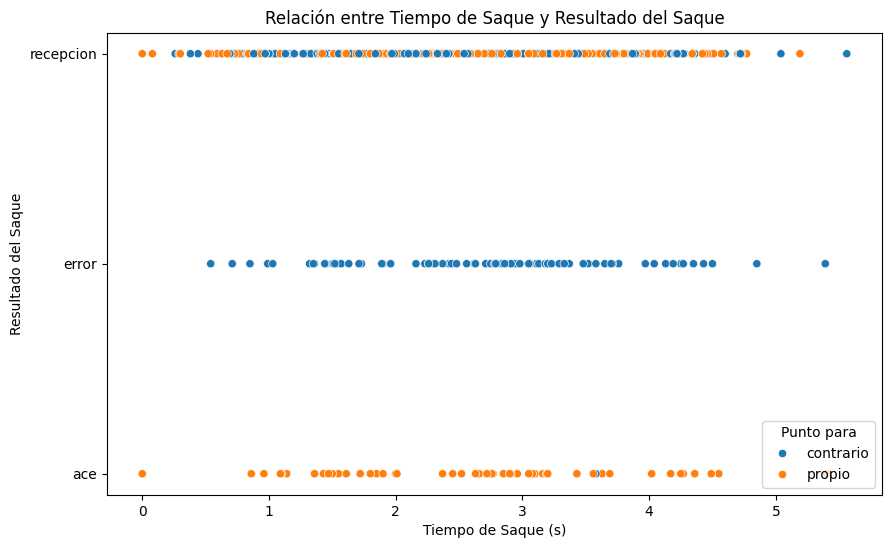

In [4]:

# Restablecer el índice del DataFrame para eliminar duplicados
partidos = partidos.reset_index(drop=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión: tiempo de saque vs. resultado
plt.figure(figsize=(10, 6))
sns.scatterplot(data=partidos, x='Tiempo de saque', y='Resultado del saque', hue='Punto para')
plt.title('Relación entre Tiempo de Saque y Resultado del Saque')
plt.xlabel('Tiempo de Saque (s)')
plt.ylabel('Resultado del Saque')
plt.show()


C:\Users\paula\AppData\Local\Temp\ipykernel_28280\790879306.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=saques_exitosos, x='Direccion del saque', order=order, palette="viridis")


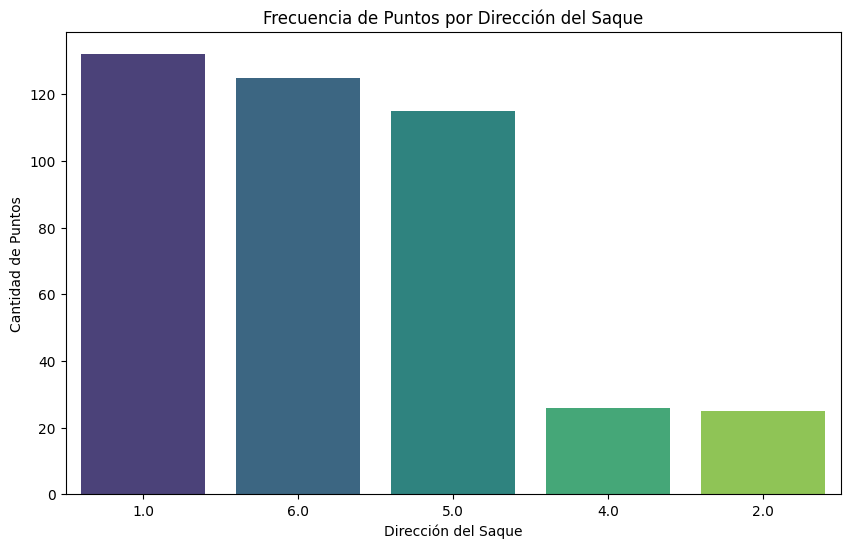

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar los datos por frecuencia de la dirección del saque
order = saques_exitosos['Direccion del saque'].value_counts().index

# Gráfico de barras: dirección del saque y puntos obtenidos, ordenado y con colores
plt.figure(figsize=(10, 6))
sns.countplot(data=saques_exitosos, x='Direccion del saque', order=order, palette="viridis")
plt.title('Frecuencia de Puntos por Dirección del Saque')
plt.xlabel('Dirección del Saque')
plt.ylabel('Cantidad de Puntos')
plt.show()


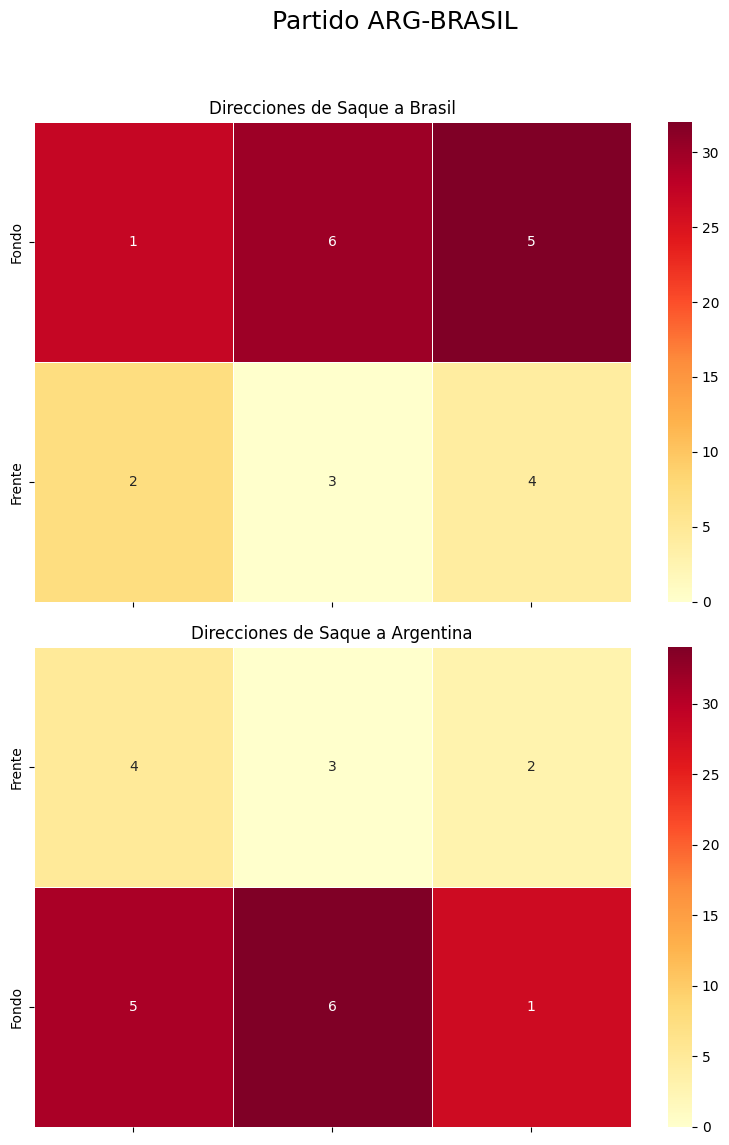

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrar los datos para cada equipo
equipo_ARG = partido1[partido1['Equipo que saca'] == 'ARG']
equipo_OTRO = partido1[partido1['Equipo que saca'] != 'ARG']

# Contar la cantidad de saques por dirección (1 a 6) para cada equipo
saques_ARG = equipo_ARG['Direccion del saque'].value_counts().sort_index()
saques_OTRO = equipo_OTRO['Direccion del saque'].value_counts().sort_index()

# Crear matrices 2x3 para representar las posiciones de saque en la cancha de vóley
cancha_ARG = np.zeros((2, 3))
cancha_OTRO = np.zeros((2, 3))

# Mapeo de las posiciones en la cancha según la disposición ajustada
# Para Argentina: 
posiciones_ARG = {
    1: (0, 0),  # Fila 0, Columna 0 (Fondo Izquierda)
    6: (0, 1),  # Fila 0, Columna 1 (Fondo Centro)
    5: (0, 2),  # Fila 0, Columna 2 (Fondo Derecha)
    2: (1, 0),  # Fila 1, Columna 0 (Frente Izquierda)
    3: (1, 1),  # Fila 1, Columna 1 (Frente Centro)
    4: (1, 2)   # Fila 1, Columna 2 (Frente Derecha)
}

# Para el equipo oponente:
posiciones_OTRO = {
    5: (1, 0),  # Fila 0, Columna 0 (Frente Izquierda)
    6: (1, 1),  # Fila 0, Columna 1 (Frente Centro)
    1: (1, 2),  # Fila 0, Columna 2 (Frente Derecha)
    4: (0, 0),  # Fila 1, Columna 0 (Fondo Izquierda)
    3: (0, 1),  # Fila 1, Columna 1 (Fondo Centro)
    2: (0, 2)   # Fila 1, Columna 2 (Fondo Derecha)
}

# Asignar las frecuencias de saque a cada posición en la cancha para equipo ARG
for pos, count in saques_ARG.items():
    fila, columna = posiciones_ARG[pos]
    cancha_ARG[fila, columna] = count

# Asignar las frecuencias de saque a cada posición en la cancha para equipo OTRO
for pos, count in saques_OTRO.items():
    fila, columna = posiciones_OTRO[pos]
    cancha_OTRO[fila, columna] = count

# Crear las etiquetas de posición para cada celda según el nuevo orden
etiquetas_ARG = np.array([['1', '6', '5'], ['2', '3', '4']])
etiquetas_OTRO = np.array([['4', '3', '2'], ['5', '6', '1']])

# Crear la figura con dos subplots para los dos heatmaps en disposición vertical
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Graficar el heatmap para el equipo ARG
sns.heatmap(cancha_ARG, annot=etiquetas_ARG, fmt='', cmap="YlOrRd", cbar=True, linewidths=0.5,
            yticklabels=['Fondo', 'Frente'], ax=ax1)
ax1.set_title("Direcciones de Saque a Brasil")
ax1.set_xticklabels([])  # Eliminar etiquetas del eje x
ax1.set_xlabel("")  # Eliminar título del eje x

# Graficar el heatmap para el equipo OTRO en la misma disposición
sns.heatmap(cancha_OTRO, annot=etiquetas_OTRO, fmt='', cmap="YlOrRd", cbar=True, linewidths=0.5,
            yticklabels=['Frente', 'Fondo'], ax=ax2)
ax2.set_title("Direcciones de Saque a Argentina")
ax2.set_xticklabels([])  # Eliminar etiquetas del eje x
ax2.set_xlabel("")  # Eliminar título del eje x

# Aumentar el tamaño de la fuente del título principal
plt.suptitle("Partido ARG-BRASIL", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\paula\AppData\Local\Temp\ipykernel_28280\296928182.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  equipo_ARG = partido5[partido1['Equipo que saca'] == 'ARG']
C:\Users\paula\AppData\Local\Temp\ipykernel_28280\296928182.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  equipo_OTRO = partido5[partido1['Equipo que saca'] != 'ARG']


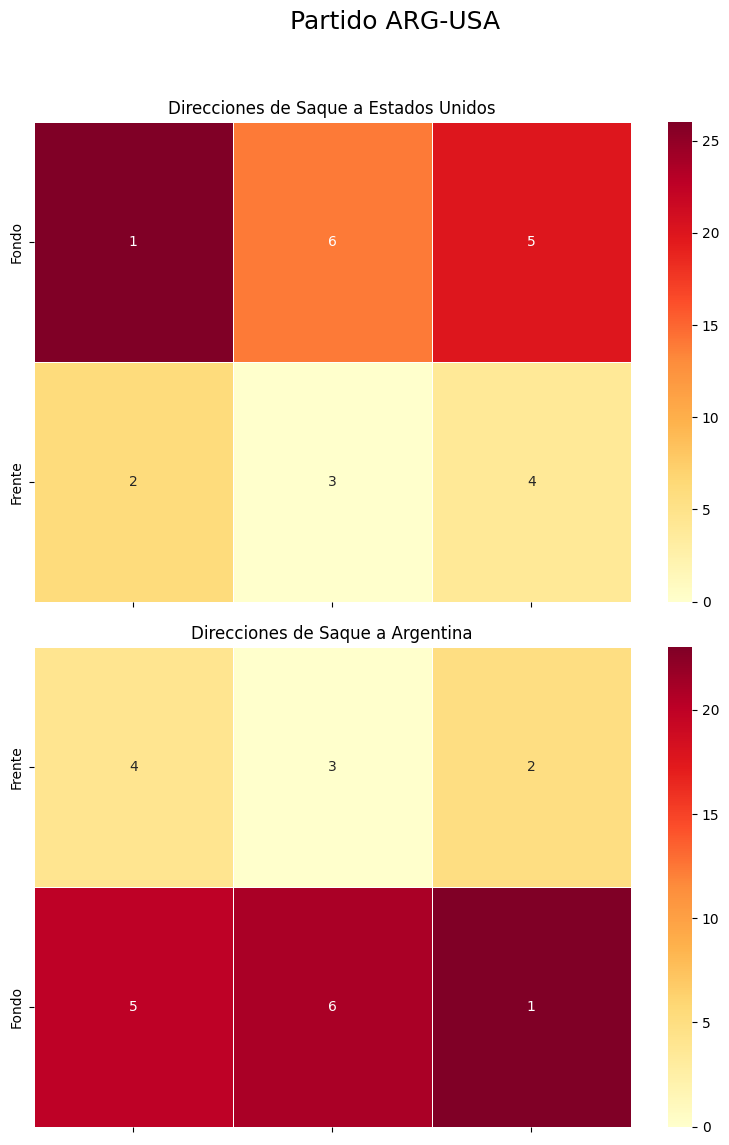

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrar los datos para cada equipo
equipo_ARG = partido5[partido1['Equipo que saca'] == 'ARG']
equipo_OTRO = partido5[partido1['Equipo que saca'] != 'ARG']

# Contar la cantidad de saques por dirección (1 a 6) para cada equipo
saques_ARG = equipo_ARG['Direccion del saque'].value_counts().sort_index()
saques_OTRO = equipo_OTRO['Direccion del saque'].value_counts().sort_index()

# Crear matrices 2x3 para representar las posiciones de saque en la cancha de vóley
cancha_ARG = np.zeros((2, 3))
cancha_OTRO = np.zeros((2, 3))

# Mapeo de las posiciones en la cancha según la disposición ajustada
# Para Argentina: 
posiciones_ARG = {
    1: (0, 0),  # Fila 0, Columna 0 (Fondo Izquierda)
    6: (0, 1),  # Fila 0, Columna 1 (Fondo Centro)
    5: (0, 2),  # Fila 0, Columna 2 (Fondo Derecha)
    2: (1, 0),  # Fila 1, Columna 0 (Frente Izquierda)
    3: (1, 1),  # Fila 1, Columna 1 (Frente Centro)
    4: (1, 2)   # Fila 1, Columna 2 (Frente Derecha)
}

# Para el equipo oponente:
posiciones_OTRO = {
    5: (1, 0),  # Fila 0, Columna 0 (Frente Izquierda)
    6: (1, 1),  # Fila 0, Columna 1 (Frente Centro)
    1: (1, 2),  # Fila 0, Columna 2 (Frente Derecha)
    4: (0, 0),  # Fila 1, Columna 0 (Fondo Izquierda)
    3: (0, 1),  # Fila 1, Columna 1 (Fondo Centro)
    2: (0, 2)   # Fila 1, Columna 2 (Fondo Derecha)
}

# Asignar las frecuencias de saque a cada posición en la cancha para equipo ARG
for pos, count in saques_ARG.items():
    fila, columna = posiciones_ARG[pos]
    cancha_ARG[fila, columna] = count

# Asignar las frecuencias de saque a cada posición en la cancha para equipo OTRO
for pos, count in saques_OTRO.items():
    fila, columna = posiciones_OTRO[pos]
    cancha_OTRO[fila, columna] = count

# Crear las etiquetas de posición para cada celda según el nuevo orden
etiquetas_ARG = np.array([['1', '6', '5'], ['2', '3', '4']])
etiquetas_OTRO = np.array([['4', '3', '2'], ['5', '6', '1']])

# Crear la figura con dos subplots para los dos heatmaps en disposición vertical
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Graficar el heatmap para el equipo ARG
sns.heatmap(cancha_ARG, annot=etiquetas_ARG, fmt='', cmap="YlOrRd", cbar=True, linewidths=0.5,
            yticklabels=['Fondo', 'Frente'], ax=ax1)
ax1.set_title("Direcciones de Saque a Estados Unidos")
ax1.set_xticklabels([])  # Eliminar etiquetas del eje x
ax1.set_xlabel("")  # Eliminar título del eje x

# Graficar el heatmap para el equipo OTRO en la misma disposición
sns.heatmap(cancha_OTRO, annot=etiquetas_OTRO, fmt='', cmap="YlOrRd", cbar=True, linewidths=0.5,
            yticklabels=['Frente', 'Fondo'], ax=ax2)
ax2.set_title("Direcciones de Saque a Argentina")
ax2.set_xticklabels([])  # Eliminar etiquetas del eje x
ax2.set_xlabel("")  # Eliminar título del eje x

# Aumentar el tamaño de la fuente del título principal
plt.suptitle("Partido ARG-USA", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

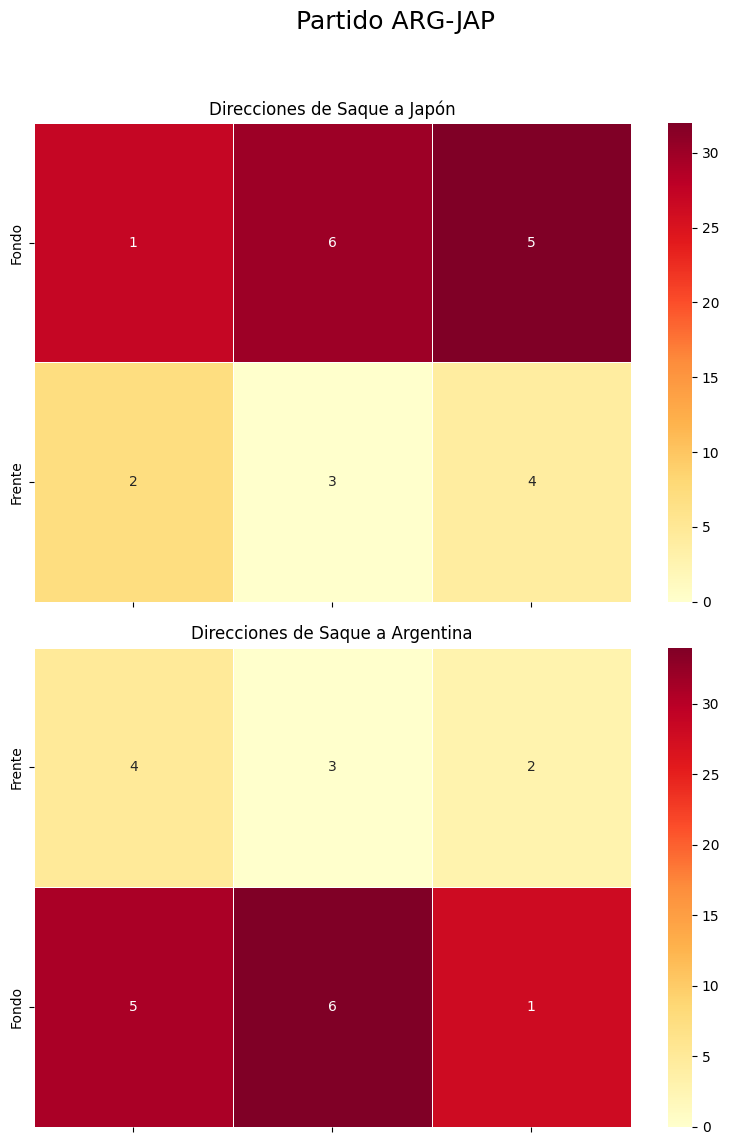

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrar los datos para cada equipo
equipo_ARG = partido1[partido1['Equipo que saca'] == 'ARG']
equipo_OTRO = partido1[partido1['Equipo que saca'] != 'ARG']

# Contar la cantidad de saques por dirección (1 a 6) para cada equipo
saques_ARG = equipo_ARG['Direccion del saque'].value_counts().sort_index()
saques_OTRO = equipo_OTRO['Direccion del saque'].value_counts().sort_index()

# Crear matrices 2x3 para representar las posiciones de saque en la cancha de vóley
cancha_ARG = np.zeros((2, 3))
cancha_OTRO = np.zeros((2, 3))

# Mapeo de las posiciones en la cancha según la disposición ajustada
# Para Argentina: 
posiciones_ARG = {
    1: (0, 0),  # Fila 0, Columna 0 (Fondo Izquierda)
    6: (0, 1),  # Fila 0, Columna 1 (Fondo Centro)
    5: (0, 2),  # Fila 0, Columna 2 (Fondo Derecha)
    2: (1, 0),  # Fila 1, Columna 0 (Frente Izquierda)
    3: (1, 1),  # Fila 1, Columna 1 (Frente Centro)
    4: (1, 2)   # Fila 1, Columna 2 (Frente Derecha)
}

# Para el equipo oponente:
posiciones_OTRO = {
    5: (1, 0),  # Fila 0, Columna 0 (Frente Izquierda)
    6: (1, 1),  # Fila 0, Columna 1 (Frente Centro)
    1: (1, 2),  # Fila 0, Columna 2 (Frente Derecha)
    4: (0, 0),  # Fila 1, Columna 0 (Fondo Izquierda)
    3: (0, 1),  # Fila 1, Columna 1 (Fondo Centro)
    2: (0, 2)   # Fila 1, Columna 2 (Fondo Derecha)
}

# Asignar las frecuencias de saque a cada posición en la cancha para equipo ARG
for pos, count in saques_ARG.items():
    fila, columna = posiciones_ARG[pos]
    cancha_ARG[fila, columna] = count

# Asignar las frecuencias de saque a cada posición en la cancha para equipo OTRO
for pos, count in saques_OTRO.items():
    fila, columna = posiciones_OTRO[pos]
    cancha_OTRO[fila, columna] = count

# Crear las etiquetas de posición para cada celda según el nuevo orden
etiquetas_ARG = np.array([['1', '6', '5'], ['2', '3', '4']])
etiquetas_OTRO = np.array([['4', '3', '2'], ['5', '6', '1']])

# Crear la figura con dos subplots para los dos heatmaps en disposición vertical
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Graficar el heatmap para el equipo ARG
sns.heatmap(cancha_ARG, annot=etiquetas_ARG, fmt='', cmap="YlOrRd", cbar=True, linewidths=0.5,
            yticklabels=['Fondo', 'Frente'], ax=ax1)
ax1.set_title("Direcciones de Saque a Japón")
ax1.set_xticklabels([])  # Eliminar etiquetas del eje x
ax1.set_xlabel("")  # Eliminar título del eje x

# Graficar el heatmap para el equipo OTRO en la misma disposición
sns.heatmap(cancha_OTRO, annot=etiquetas_OTRO, fmt='', cmap="YlOrRd", cbar=True, linewidths=0.5,
            yticklabels=['Frente', 'Fondo'], ax=ax2)
ax2.set_title("Direcciones de Saque a Argentina")
ax2.set_xticklabels([])  # Eliminar etiquetas del eje x
ax2.set_xlabel("")  # Eliminar título del eje x

# Aumentar el tamaño de la fuente del título principal
plt.suptitle("Partido ARG-JAP", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [37]:
import pandas as pd

# Combinar todos los partidos en un solo DataFrame
df_partidos = pd.concat([partido1, partido2, partido3, partido4, partido5], ignore_index=True)

# Filtrar solo los datos de Argentina y los saques errados
saques_errados_ARG = df_partidos[(df_partidos['Equipo que saca'] == 'ARG') & 
                                 (df_partidos['Resultado del saque'] == 'error')]

# Agrupar por jugador y dirección del saque, y contar la cantidad total de errores
errores_por_jugador_posicion = saques_errados_ARG.groupby(['Sacador', 'Direccion del saque']).size()

# Convertir el resultado en un DataFrame y renombrar la columna de conteo
errores_por_jugador_posicion = errores_por_jugador_posicion.reset_index(name='Cantidad de Errores')

# Pivoteamos la tabla para que cada posición esté en una columna y cada jugador en una fila
tabla_errores_por_posicion = errores_por_jugador_posicion.pivot(index='Sacador', columns='Direccion del saque', values='Cantidad de Errores').fillna(0)

# Aplicar un gradiente de color para visualizar mejor
tabla_coloreada = tabla_errores_por_posicion.style.background_gradient(cmap="Reds", vmin=0).format("{:.0f}")

# Mostrar la tabla coloreada
tabla_coloreada


Direccion del saque,1.000000,2.000000,4.000000,5.000000,6.000000
Sacador,,,,,
Danani,3,0,0,0,1
De Cecco,1,0,0,0,2
Gallego,1,0,0,1,0
Kukartsev,0,0,0,1,0
Lima B.,0,0,0,2,0
Loser Bruno,3,0,0,1,1
Martinez Franchi,0,0,0,0,1
Palacios,0,1,0,2,3
Palonsky,2,0,1,4,1


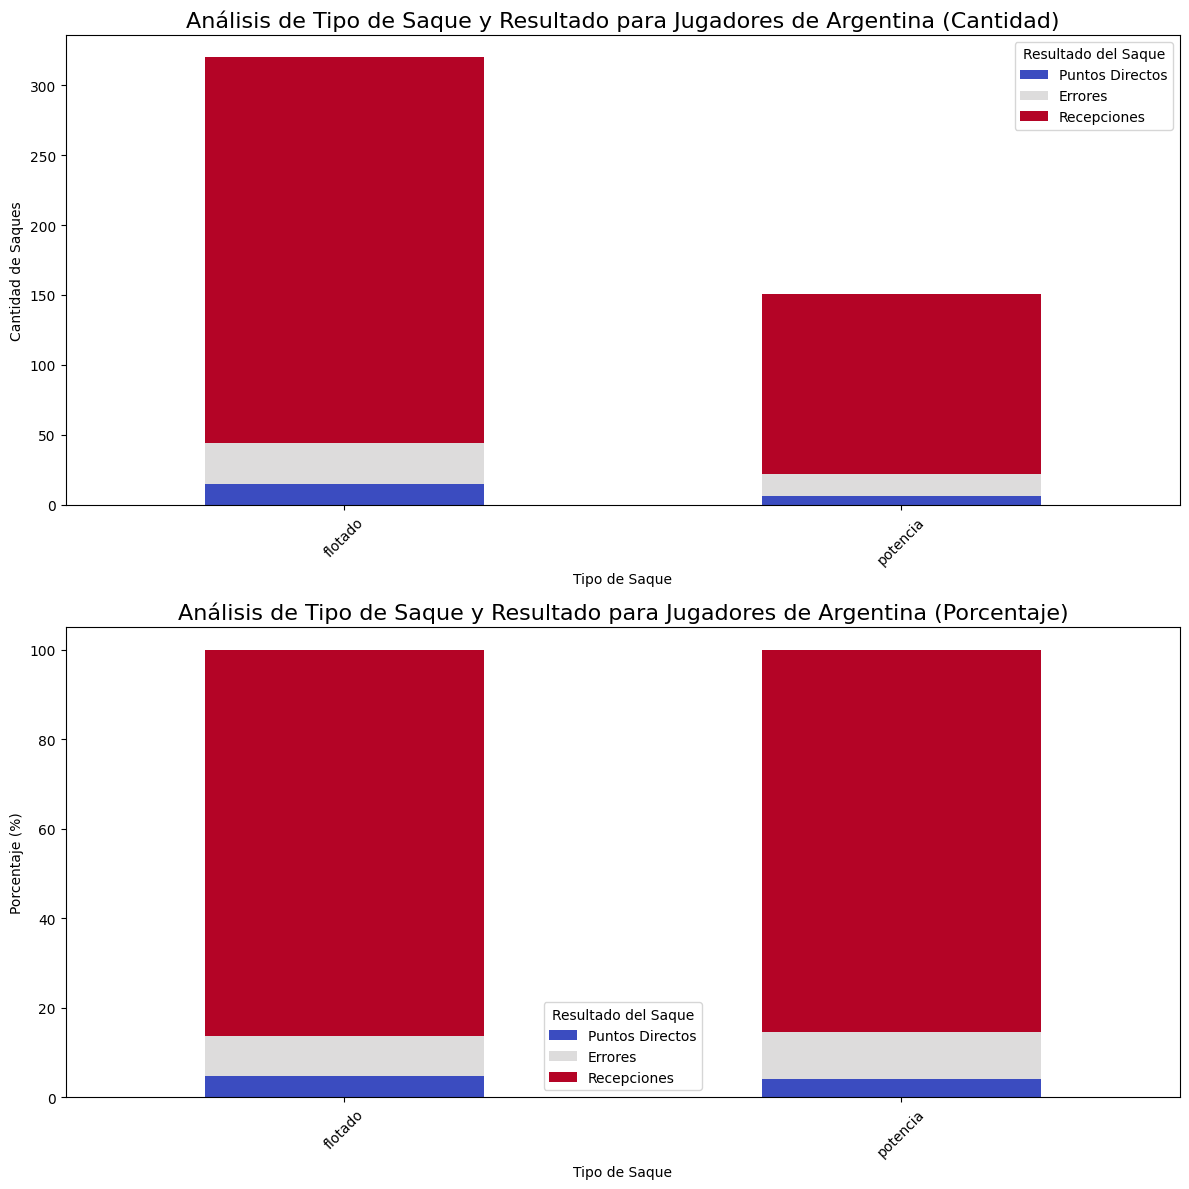

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Combinar todos los partidos en un solo DataFrame
df_partidos = pd.concat([partido1, partido2, partido3, partido4, partido5], ignore_index=True)

# Filtrar solo los datos de Argentina
saques_ARG = df_partidos[df_partidos['Equipo que saca'] == 'ARG']

# Agrupar los datos por tipo de saque y resultado del saque, y contar las ocurrencias
resultado_por_tipo_saque = saques_ARG.groupby(['Tipo de saque', 'Resultado del saque']).size().unstack(fill_value=0)

# Renombrar las columnas para mayor claridad
resultado_por_tipo_saque = resultado_por_tipo_saque.rename(columns={'ace': 'Puntos Directos', 'recepcion': 'Recepciones', 'error': 'Errores'})

# Calcular los porcentajes para cada tipo de saque
resultado_por_tipo_saque_percentage = resultado_por_tipo_saque.div(resultado_por_tipo_saque.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas para cantidades
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Graficar las cantidades de cada tipo de saque en barras apiladas
resultado_por_tipo_saque.plot(
    kind='bar', stacked=True, ax=ax[0], colormap='coolwarm'
)
ax[0].set_title("Análisis de Tipo de Saque y Resultado para Jugadores de Argentina (Cantidad)", fontsize=16)
ax[0].set_xlabel("Tipo de Saque")
ax[0].set_ylabel("Cantidad de Saques")
ax[0].legend(title="Resultado del Saque")
ax[0].tick_params(axis='x', rotation=45)

# Graficar los porcentajes de cada tipo de saque en barras apiladas
resultado_por_tipo_saque_percentage.plot(
    kind='bar', stacked=True, ax=ax[1], colormap='coolwarm'
)
ax[1].set_title("Análisis de Tipo de Saque y Resultado para Jugadores de Argentina (Porcentaje)", fontsize=16)
ax[1].set_xlabel("Tipo de Saque")
ax[1].set_ylabel("Porcentaje (%)")
ax[1].legend(title="Resultado del Saque")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


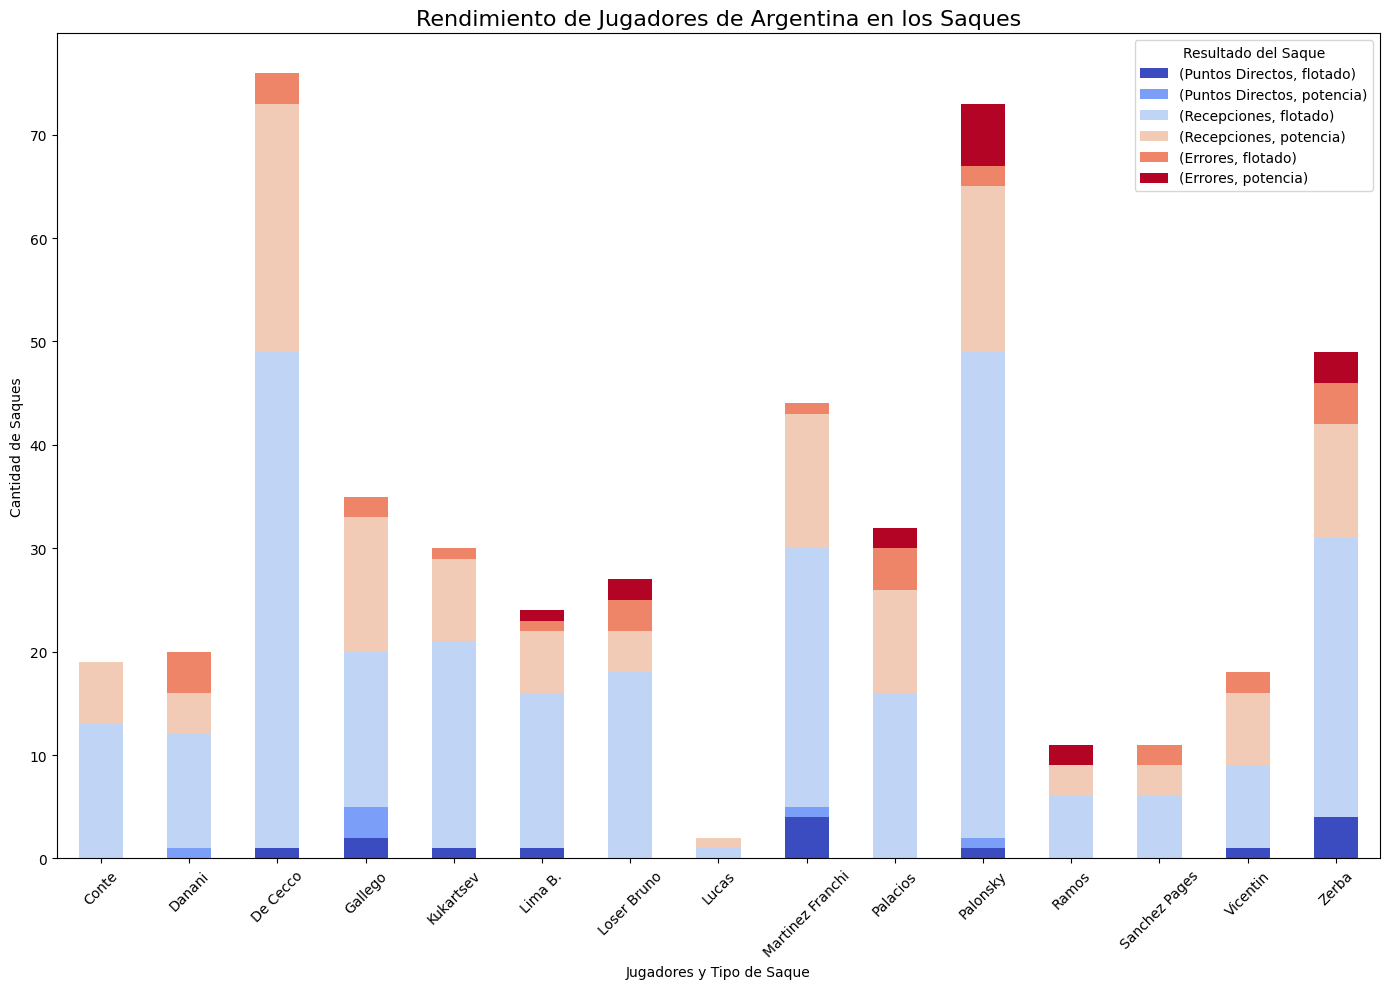

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Combinar todos los partidos en un solo DataFrame
df_partidos = pd.concat([partido1, partido2, partido3, partido4, partido5], ignore_index=True)

# Filtrar solo los datos de Argentina
saques_ARG = df_partidos[df_partidos['Equipo que saca'] == 'ARG']

# Agrupar los datos por jugador, tipo de saque y resultado del saque, y contar las ocurrencias
resultado_por_tipo_saque = saques_ARG.groupby(['Sacador', 'Tipo de saque', 'Resultado del saque']).size().unstack(fill_value=0)

# Renombrar las columnas para mayor claridad
resultado_por_tipo_saque = resultado_por_tipo_saque.rename(columns={'ace': 'Puntos Directos', 'recepcion': 'Recepciones', 'error': 'Errores'})

# Crear el gráfico de barras apiladas por jugador y tipo de saque
fig, ax = plt.subplots(figsize=(14, 10))

# Graficar el rendimiento de cada jugador
resultado_por_tipo_saque.groupby(['Sacador', 'Tipo de saque'])[['Puntos Directos', 'Recepciones', 'Errores']].sum().unstack().plot(
    kind='bar', stacked=True, ax=ax, colormap='coolwarm'
)

# Configurar el título y etiquetas
ax.set_title("Rendimiento de Jugadores de Argentina en los Saques", fontsize=16)
ax.set_xlabel("Jugadores y Tipo de Saque")
ax.set_ylabel("Cantidad de Saques")
plt.xticks(rotation=45)
plt.legend(title="Resultado del Saque")
plt.tight_layout()

plt.show()


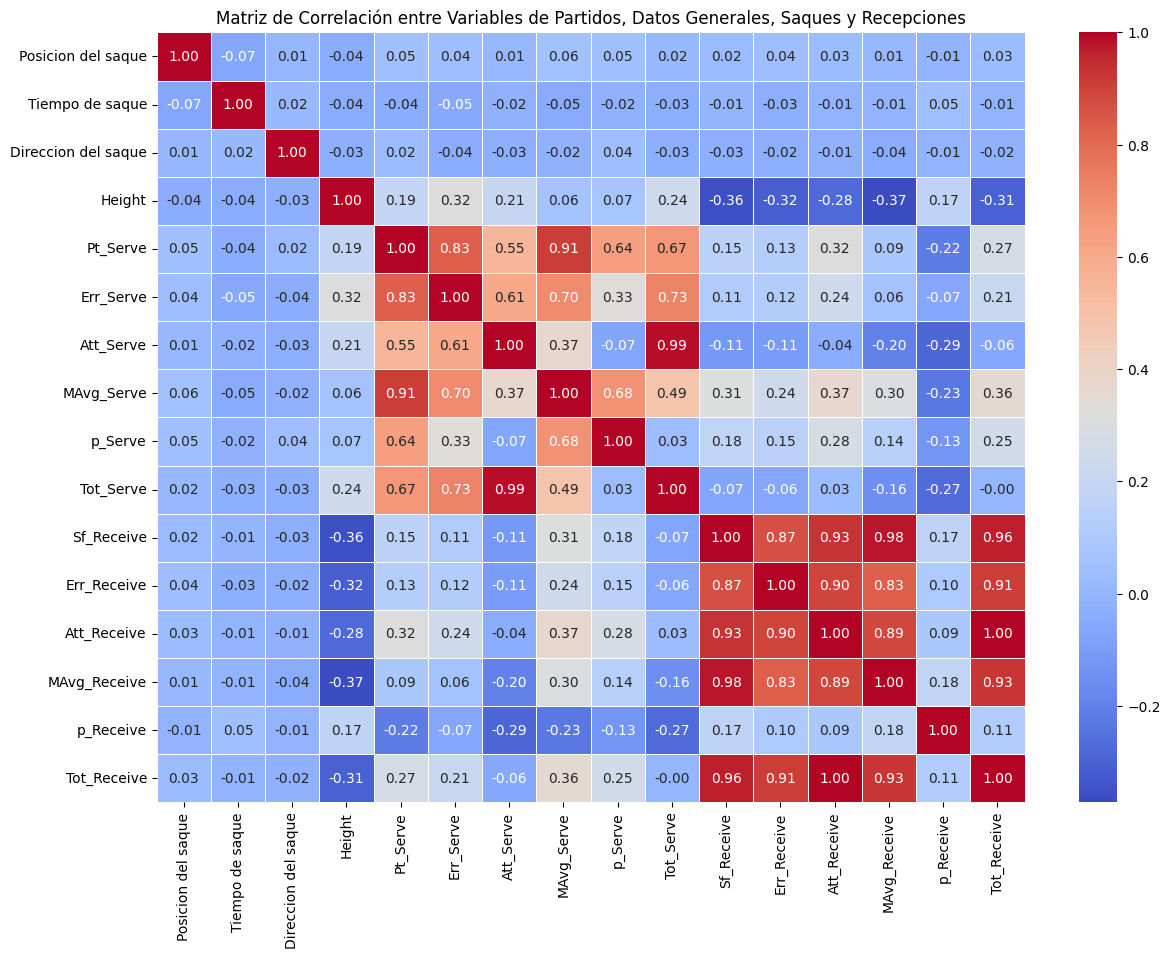

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Combinar los datos de los partidos en un solo DataFrame
df_partidos = pd.concat([partido1, partido2, partido3, partido4, partido5], ignore_index=True)

# Realizar una combinación (merge) de los datos de partidos con las otras tablas usando las columnas "Sacador" y "Name"
df_completo = df_partidos.merge(datos_generales, how='left', left_on='Sacador', right_on='Name')
df_completo = df_completo.merge(datos_saques, how='left', left_on='Sacador', right_on='Name')
df_completo = df_completo.merge(datos_recepciones, how='left', left_on='Sacador', right_on='Name')

# Seleccionar solo las columnas numéricas para el análisis de correlación y eliminar la columna 'Birth_Year'
df_numerico = df_completo.select_dtypes(include=['float64', 'int64']).drop(columns=['Birth_Year'], errors='ignore')

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación entre Variables de Partidos, Datos Generales, Saques y Recepciones")
plt.show()
